<a href="https://colab.research.google.com/github/thedarredondo/data-science-fundamentals/blob/main/Unit6/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

Nope! We only use it to compare to others, looking for the more positive number. It doesn't mean anything other than in relation to other elpd_loos.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when we use too many variables and make the model too accurate to the training data. Then, it doesn't generalize to new data as well, because it is too specific to the training data.

**Task3**:

How do we mitigate overfitting?

We select the model with the fewest number of variables that is still accurate, and we use regularizing priors. By not giving it strong priors, we let it find the best model for the data, rather than the best model for the training data/our understanding of it.

**Task4**:

How do we mitigate underfitting?

By using elpd_loo comparisons to select an accurate model, while still trying to use the fewest variables possible. Using a high elpd_loo ensures that it will be (close to) the most accurate possible.

**Task5**:

Why would we want more than one predictor in a model?

Because more than one variable can cause changes in our dependent variable. By using multiple predictors, it allows the model to capture more patterns in the data, as well as analyze the interactions between predictors. Using only a single variable, we can only capture a single trend, which may not be the most accurate representation of the underlying process.

**Task6**:

Can we have too many predictors? How would we now?

Yes. We can have too many predictors, which can lead to overfitting. One way we can tell if we have too many predictors is by using elpd_loo to compare to a reference model with all the variables. If this model is too accurate to the training data, then we have too many variables. Another way to to draw a causal DAG, and see if the variables are all necessary to explain the dependent variable.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of choosing which variables to include in a model. We begin by drawing a causal DAG, and analyzing which variables affect the output, as well as which variables interact with one another. We then try a few viable combinations, comparing them using elpd_loo.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

When graphing the linear regression of the quantitative variable versus the dependent variable with respect to the category, every line will have the same slope (as that distribution is shared across all categories), but a different y-intercept. That is because the 'slope' of the categorical variable is equivalent to translating the y-intercept, since the categorical variable is discrete.

The second model will allow the slopes to change between categories as well as y-intercepts. The hierarchical nature allows the 'slope' distributions to talk to one another, so rather than that discrete separation mentioned above, the slopes will be able to change as well.

The third model will be very similar to the second, as it the third term once again removes that discrete limit, which can only act as a change to the y-intercept. By having a 'slope' based on both the categorical variable and the quantitative variable, it allows for each category to have its own slope variance. It allows the quantitative variable to mean something different for each category.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We first pick a predictor to go on the X axis, and then plot the dependent variable on the Y axis. Then, if we have more variables we would have to pick some way to represent them; different colors, different plots, etc. If the model has too many predictors however, it will be impossible (or at least incredibly impractical) to represent all at once. Not to mention that this method only allows for showing the lines of one predictor against the dependent variable, and categorically representing the others. For several quantitative variables, that doesn't show the whole picture.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [11]:
import pandas as pd
import bambi as bmb
import arviz as az

#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [12]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp", "3PA":"TPA"}, inplace=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, FTp, Pos]


/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, 1|Pos_sigma, 1|Pos_offset, FTp|Pos_sigma, FTp|Pos_offset]


/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, FTp, Pos, FTp:Pos]


/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, FTp, Pos, TPA, FTp:Pos, FTp:TPA, Pos:TPA]


/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, FTp, Pos, TPA, Pos:TPA]


/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/opt/homebrew/anaconda3/envs/data-science-fundamentals/lib/python3.10/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This 

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

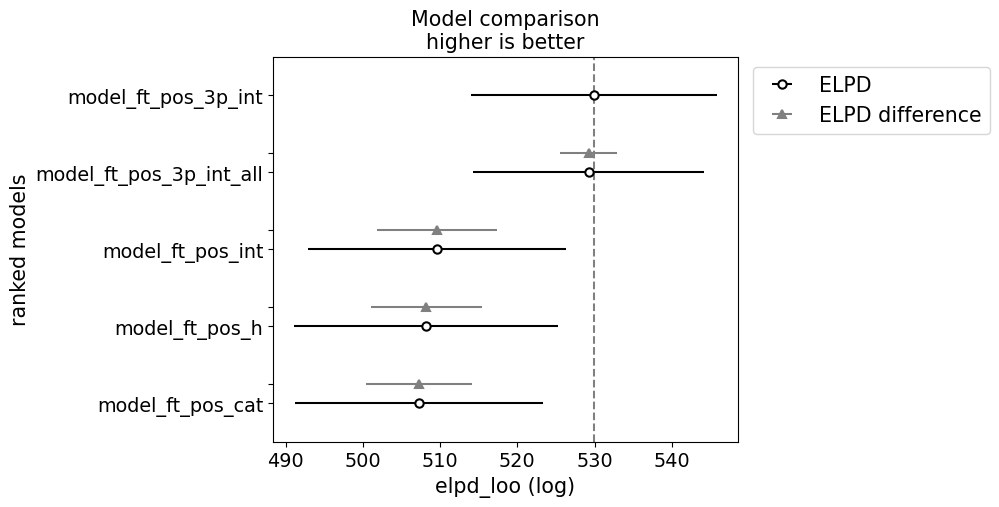

In [15]:
model_ft_pos_cat = bmb.Model("FGp ~ FTp + Pos", data=bb)
model_ft_pos_h = bmb.Model("FGp ~ (FTp|Pos)", data=bb)
model_ft_pos_int = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb)
model_ft_pos_3p_int_all = bmb.Model("FGp ~ FTp + Pos + TPA + FTp:Pos + FTp:TPA + Pos:TPA", data=bb)
model_ft_pos_3p_int = bmb.Model("FGp ~ FTp + Pos + TPA + Pos:TPA", data=bb)

az.plot_compare(az.compare({
    "model_ft_pos_cat":model_ft_pos_cat.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_h":model_ft_pos_h.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_int":model_ft_pos_int.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_3p_int_all":model_ft_pos_3p_int_all.fit(idata_kwargs={'log_likelihood': True}),
    "model_ft_pos_3p_int":model_ft_pos_3p_int.fit(idata_kwargs={'log_likelihood': True})
}))

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

The model with all three variables, but only interacting 3PA and Position did best- marginally. Adding interactions between every variable did pretty much the same. Since it did do worse, however, that likely means that FT% isn't really related to either position or three point attempts. Not a basketball guy, but that seems plausible. As for the others, they are all fairly similar, but the interaction did better than the hierarchical did better than the pure categorical, for reasons discussed in the notes.

The (in my opinion) most interesting/important observation is the divide between including 3PA and not. Including it did significantly better, which means that 3PA is a significant predictor of FG%. This is likely because 3PA is a good indicator of how good a player is at shooting.